In [7]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import seaborn as sns
import pandas as pd

with open("/Users/nickgutin/Documents/GitHub/pentad-analysis-automation/cleaned_speeches.json", "r") as file:
  speeches = json.load(file)

In [8]:
speeches[-1]

{'speech_number': 67,
 'speech_metadata': {'date': '2024-11-02',
  'type': 'Rally',
  'location': 'Charlotte, North Carolina',
  'chunk_id': 'full',
  'word_count': 2790},
 'pentad_analysis': {'act_frequencies': {'policy_economic': 16,
   'policy_social': 6,
   'policy_foreign': 1,
   'attack_opp': 14,
   'past_actions': 8},
  'agent_frequencies': {'self': 20,
   'admin': 2,
   'trump': 17,
   'billionaires': 2,
   'marginalized': 4},
  'ratio_frequencies': {'self+policy_economic': 9,
   'self+policy_social': 3,
   'self+policy_foreign': 1,
   'self+attack_opp': 2,
   'self+past_actions': 5,
   'admin+policy_economic': 1,
   'admin+policy_social': 0,
   'admin+policy_foreign': 0,
   'admin+attack_opp': 0,
   'admin+past_actions': 1,
   'trump+policy_economic': 4,
   'trump+policy_social': 1,
   'trump+policy_foreign': 0,
   'trump+attack_opp': 12,
   'trump+past_actions': 0,
   'billionaires+policy_economic': 2,
   'billionaires+policy_social': 0,
   'billionaires+policy_foreign': 0,
 

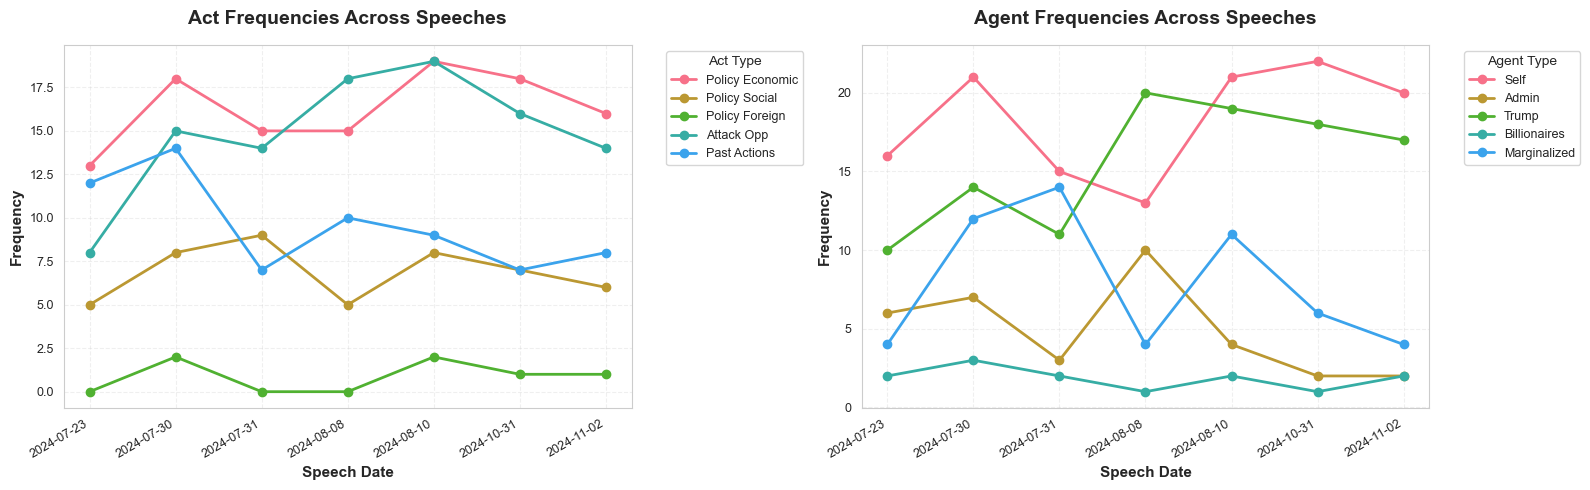

In [9]:
dates = [s['speech_metadata']['date'] for s in speeches]
act_df = pd.DataFrame([s['pentad_analysis']['act_frequencies'] for s in speeches], index=dates)
agent_df = pd.DataFrame([s['pentad_analysis']['agent_frequencies'] for s in speeches], index=dates)

#Clean column 
act_df.columns = [col.replace('_', ' ').title() for col in act_df.columns]
agent_df.columns = [col.replace('_', ' ').title() for col in agent_df.columns]


sns.set_style("whitegrid")
sns.set_palette("husl")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
x_positions = range(len(dates))

#Act freq
for col in act_df.columns:
    ax1.plot(x_positions, act_df[col], marker='o', linewidth=2, markersize=6, label=col)
ax1.set_title('Act Frequencies Across Speeches', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_xlabel('Speech Date', fontsize=11, fontweight='bold')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(dates, rotation=30, ha='right', fontsize=9)
ax1.legend(title='Act Type', fontsize=9, title_fontsize=10, frameon=True, 
           bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='y', labelsize=9)

#Agent freq
for col in agent_df.columns:
    ax2.plot(x_positions, agent_df[col], marker='o', linewidth=2, markersize=6, label=col)
ax2.set_title('Agent Frequencies Across Speeches', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_xlabel('Speech Date', fontsize=11, fontweight='bold')
ax2.set_xticks(x_positions)
ax2.set_xticklabels(dates, rotation=30, ha='right', fontsize=9)
ax2.legend(title='Agent Type', fontsize=9, title_fontsize=10, frameon=True,
           bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.savefig('pentad_analysis_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

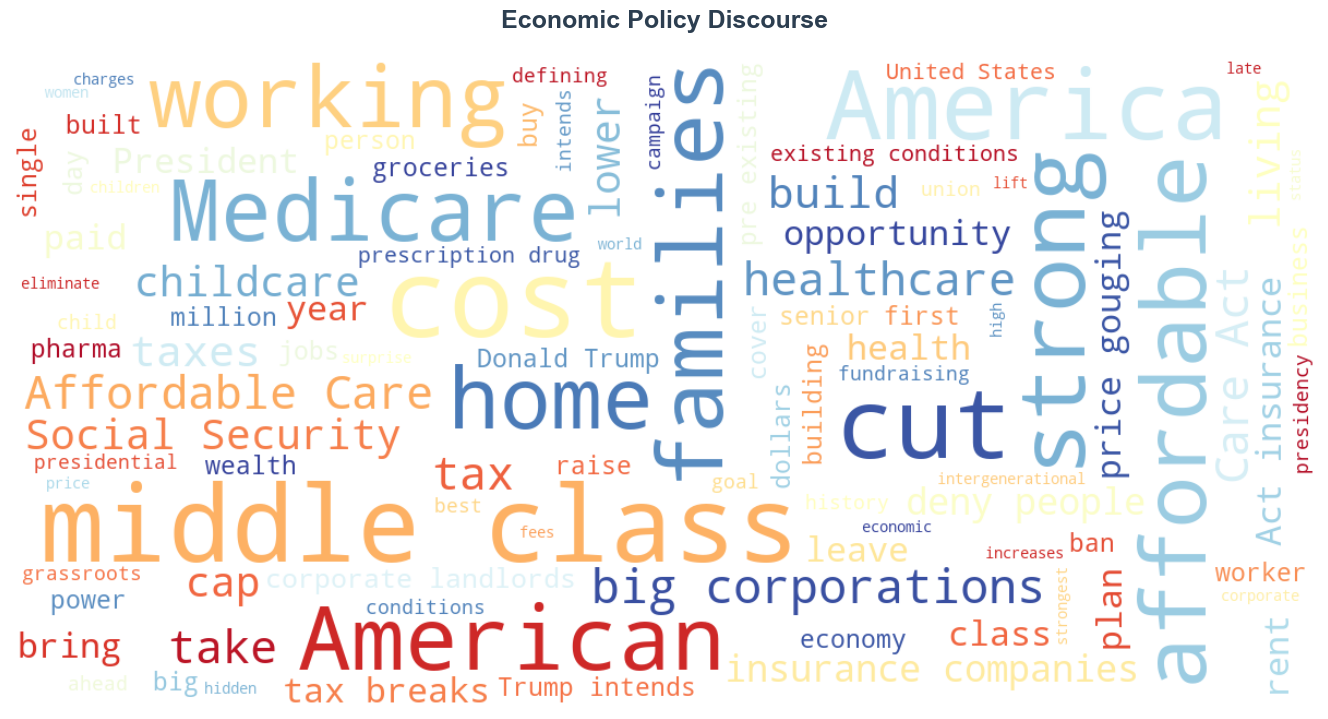

In [10]:
#Extract all text tagged as policy_economic
policy_economic_texts = []
for speech in speeches:
    for excerpt in speech['tagged_excerpts']:
        if excerpt['act'] == 'policy_economic':
            policy_economic_texts.append(excerpt['text'])


combined_text = ' '.join(policy_economic_texts)

#Create custom stopwords list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'will', 'can', 'get', 'make', 'one', 'every', 'also', 'give',
    'and', 'how', 'a', 'i', 'the', 'of', 'to', 'for', 'is', 'in',
    'that', 'it', 'on', 'with', 'you', 'my', 'we', 'our',
    'has', 'be', 'not', 'just', 'up', 'by', 'end', 'when',
    'all', 'their', 'more', 'he', 'his', 'they', 'who', 'what',
    'billionaire', 'billionaires'  # Remove if you want it gone completely
])


wordcloud = WordCloud(
    width=1200, 
    height=600,
    background_color='white',
    colormap='RdYlBu_r',
    relative_scaling=0.3,  
    min_font_size=12,
    max_font_size=100,  
    prefer_horizontal=0.7,
    stopwords=custom_stopwords,
    contour_width=0,
    contour_color='white',
    max_words=100,
    font_path=None,
    margin=10,
    normalize_plurals=True  
).generate(combined_text)

#Create figure with clean style
fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Economic Policy Discourse', 
             fontsize=18, 
             fontweight='bold', 
             pad=20,
             color='#2c3e50')

plt.tight_layout(pad=0)
plt.savefig('policy_economic_wordcloud.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white',
            edgecolor='none')
plt.show()

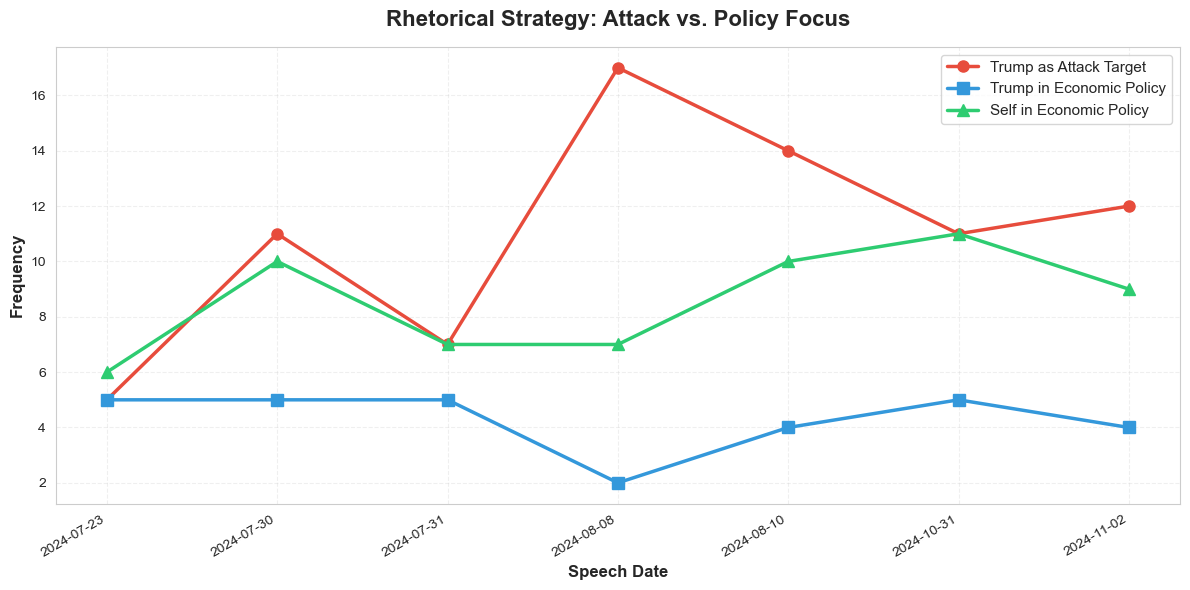

In [17]:
dates = [s['speech_metadata']['date'] for s in speeches]
ratio_df = pd.DataFrame([s['pentad_analysis']['ratio_frequencies'] for s in speeches], index=dates)

#Compare Trump as attack target vs. Trump in policy context
fig, ax = plt.subplots(figsize=(12, 6))
x_positions = range(len(dates))

ax.plot(x_positions, ratio_df['trump+attack_opp'], marker='o', linewidth=2.5, 
        markersize=8, label='Trump as Attack Target', color='#e74c3c')
ax.plot(x_positions, ratio_df['trump+policy_economic'], marker='s', linewidth=2.5, 
        markersize=8, label='Trump in Economic Policy', color='#3498db')
ax.plot(x_positions, ratio_df['self+policy_economic'], marker='^', linewidth=2.5, 
        markersize=8, label='Self in Economic Policy', color='#2ecc71')

ax.set_title('Rhetorical Strategy: Attack vs. Policy Focus', fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_xlabel('Speech Date', fontsize=12, fontweight='bold')
ax.set_xticks(x_positions)
ax.set_xticklabels(dates, rotation=30, ha='right', fontsize=10)
ax.legend(frameon=True, fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('attack_vs_policy.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

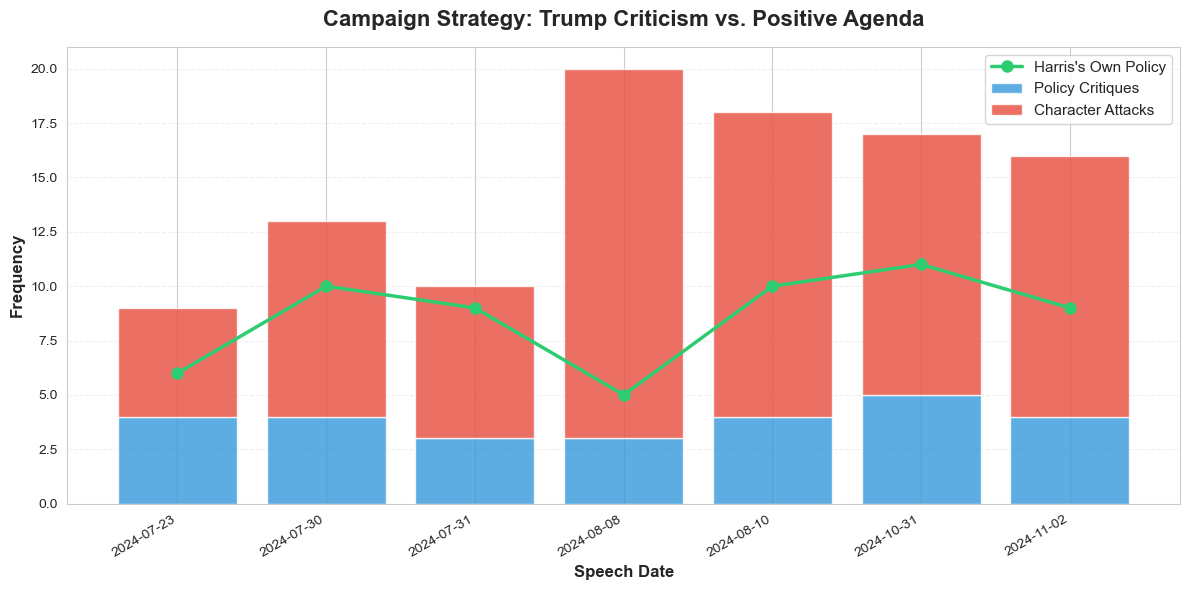

In [11]:
dates = [s['speech_metadata']['date'] for s in speeches]
ratio_df = pd.DataFrame([s['pentad_analysis']['ratio_frequencies'] for s in speeches], index=dates)


ratio_df['trump_total_negative'] = ratio_df['trump+attack_opp'] + ratio_df['trump+policy_economic']

fig, ax = plt.subplots(figsize=(12, 6))
x_positions = range(len(dates))


ax.bar(x_positions, ratio_df['trump+policy_economic'], label='Policy Critiques', 
       color='#3498db', alpha=0.8)
ax.bar(x_positions, ratio_df['trump+attack_opp'], bottom=ratio_df['trump+policy_economic'],
       label='Character Attacks', color='#e74c3c', alpha=0.8)
ax.plot(x_positions, ratio_df['self+policy_economic'], marker='o', linewidth=2.5, 
        markersize=8, label="Harris's Own Policy", color='#2ecc71', zorder=3)

ax.set_title('Campaign Strategy: Trump Criticism vs. Positive Agenda', 
             fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_xlabel('Speech Date', fontsize=12, fontweight='bold')
ax.set_xticks(x_positions)
ax.set_xticklabels(dates, rotation=30, ha='right', fontsize=10)
ax.legend(frameon=True, fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.savefig('campaign_strategy_breakdown.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()